In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import cv2

In [2]:
# img = imageio.imread("citra.jpg")
img_bgr = cv2.imread("orange.jpg")
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
height, width, channel = img_bgr.shape

In [3]:
hgr = np.zeros((256))
hgg = np.zeros((256))
hgb = np.zeros((256))
hgrgb = np.zeros((768), dtype=np.int32)

In [4]:
def makeItZero():
    for x in range(0, 256):
        hgr[x] = 0
        hgg[x] = 0
        hgb[x] = 0
    for x in range(0, 768):
        hgrgb[x] = 0

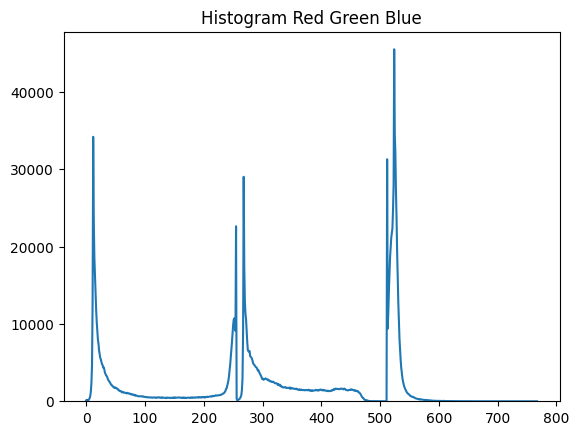

In [5]:
makeItZero()

temp = [0]
for y in range(0, height):
    for x in range(0, width):
        red = int(img[y][x][0])
        green = int(img[y][x][1])
        blue = int(img[y][x][2])
        red += 0
        green += 256
        blue += 512

        hgrgb[red] += 1
        hgrgb[green] += 1
        hgrgb[blue] += 1

binsrgb = np.linspace(0, 768, 100)
binsr = np.linspace(0, 256, 100)
plt.hist(hgr, bins=binsr, color="red", alpha=0.5)
plt.hist(hgg, bins=binsr, color="green", alpha=0.5)
plt.hist(hgb, bins=binsr, color="blue", alpha=0.5)
plt.plot(hgrgb)
plt.title("Histogram Red Green Blue")
plt.show()

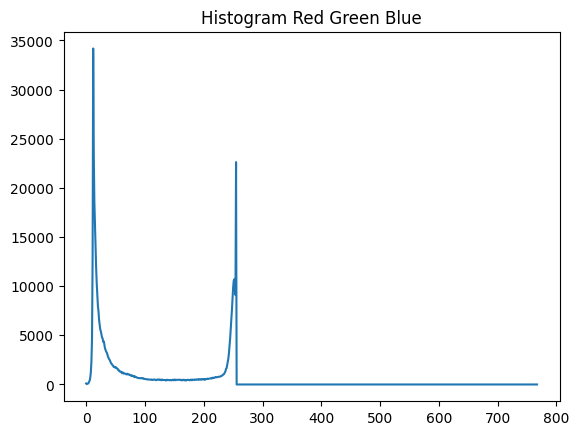

In [6]:
hist_img = cv2.calcHist([img], [0], None, [768], [0, 768])
plt.plot(hist_img)
plt.title("Histogram Red Green Blue")
plt.show()

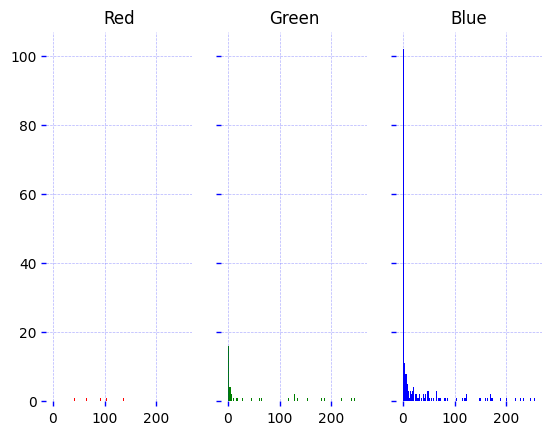

In [7]:
makeItZero()
for y in range(0, img.shape[0]):
    for x in range(0, img.shape[1]):
        red = img[y][x][0]
        green = img[y][x][1]
        blue = img[y][x][2]
        hgr[red] += 1
        hgg[green] += 1
        hgb[blue] += 1

def plot_result(red, green, blue):
    bins = np.linspace(0, 256, 128)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
    for ax in [ax1, ax2, ax3]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.grid(color='b', linestyle='--', linewidth=0.5, alpha=0.3)
        ax.tick_params(direction='out', color='b', width='1')
    ax1.set_title('Red')
    ax2.set_title('Green')
    ax3.set_title('Blue')
    ax1.hist(red, bins, color="red", alpha=1)
    ax2.hist(green, bins, color="green", alpha=1)
    ax3.hist(blue, bins, color="blue", alpha=1)
    plt.rcParams['figure.figsize'] = [20, 7]

plot_result(hgr, hgg, hgb)